<a href="https://colab.research.google.com/github/duonghiepit/Gradient-Boost/blob/main/GradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!gdown 1vXWqMxf0YQ31IGmMZpMOiuPNtgM17BZV

Downloading...
From: https://drive.google.com/uc?id=1vXWqMxf0YQ31IGmMZpMOiuPNtgM17BZV
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 19.3MB/s]


In [29]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [30]:
class MyGradientBooster:

    def __init__(self, max_depth=8, min_samples_split=5, min_samples_leaf=5, max_features=3, lr=0.1, num_iter=50):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_mean = 0

    def __calculate_loss(self, y, y_pred):
        loss = (1 / len(y)) * 0.5 * np.sum(np.square(y - y_pred))

        return loss

    def __take_gradient(self, y, y_pred):
        # grad = -(y-y_pred)  # Cho dự đoán = predict - alpha * residual
        grad = (y - y_pred)   # Cho dự đoán = predict + alpha * residual

        return grad

    def __create_base_model(self, X, y):
        base = DecisionTreeRegressor(max_depth=self.max_depth,
                                     min_samples_split=self.min_samples_split,
                                     min_samples_leaf=self.min_samples_leaf,
                                     max_features=self.max_features)
        base.fit(X, y)

        return base

    def predict(self, models, y, X):
        pred_0 = np.array([self.y_mean] * len(X))
        pred = pred_0.reshape(len(pred_0), 1)

        for i in range(len(models)):
            temp = (models[i].predict(X)).reshape(len(X), 1)
            # pred -= self.lr * temp    # Cho dự đoán = pred - alpha * residual
            pred += self.lr * temp      # Cho dự đoán = pred + alpha * residual

        return pred

    def train(self, X, y):
        models = []
        losses = []
        self.y_mean = np.mean(y)
        pred_0 = np.array([np.mean(y)] * len(y))
        pred = pred_0.reshape(len(pred_0), 1)

        for epoch in range(self.num_iter):
            loss = self.__calculate_loss(y, pred)
            # print('loss: epoch', epoch, '=', loss)
            losses.append(loss)
            grads = self.__take_gradient(y, pred)
            # print('gradient', grads)
            base = self.__create_base_model(X, grads)
            r = (base.predict(X)).reshape(len(X), 1)
            # print('r', r)
            # pred -= self.lr * r
            pred += self.lr * r
            models.append(base)

        return models, losses, pred_0

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score

In [32]:
# READ DATA
data = pd.read_csv('/content/advertising.csv')
data.fillna(0, inplace=True)

#X, y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [33]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = np.array(y_train).reshape(X_train.shape[0], 1)
y_test = np.array(y_test).reshape(X_test.shape[0], 1)

In [34]:
# TRAIN
G = MyGradientBooster()
models, losses, pred_0 = G.train(X_train, y_train)

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss'), Text(0.5, 1.0, 'Loss vs Epoch')]

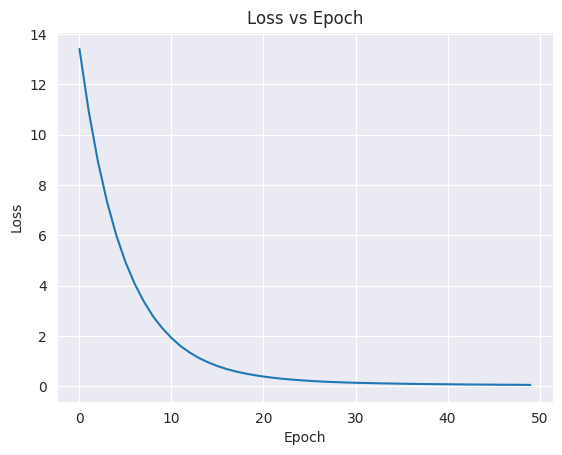

In [35]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(50),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')